# Logistic Regression Optimization

Summary: Logistic regression without an intercept via gradient descent, with an emphasis on complete separation (i.e., the classes can be perfectly separated with a linear classifier).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(314)

### The Data: 

Completly seperable where anything above the plane $$z = 2x + 3y$$ is $1$.

It is interesting to note that when the problem is completly speratable as seen then for some given $\alpha > 1$ then $R_{emp} (\theta^*) > R_{emp} (\alpha \theta^*)$. It is for this reason that without regualisation (such as $||\theta||$) the values for $\theta$ will just continue to grow.

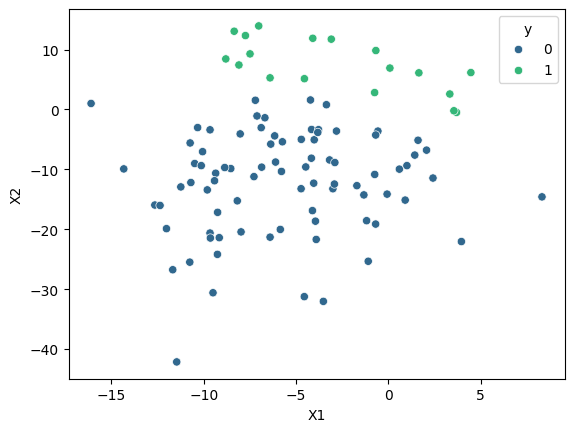

In [2]:
n = 100
X1 = np.random.normal(-5, 5, n)
X2 = np.random.normal(-10, 10, n)
X = np.array([X1, X2])

# How our data is defigned
z = 2 * X1 + 3 * X2
pr = 1 / (1 + np.exp(-z))
y = (pr > 0.5).astype(int)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

sns.scatterplot(x='X1', y='X2', hue='y',
                palette='viridis', data=df, marker='o')
plt.show()

The objective function for regularized logistic regression is:

$$
R_{emp} = \sum \left[ \log( 1 + e^{\theta^T X} ) - y \theta^T X \right] + \lambda \|\theta\|^2_2
$$

Where:
- The first part represents the log-likelihood for logistic regression.
- The second part is a regularization term to prevent overfitting (L2 regularization on the parameter vector $\theta$.
- $\lambda$ is the regularization strength.


In [3]:
def Remp(t, X, y, l=0.1):
    z = np.dot(t,  X)
    loss = np.sum(np.log(1 + np.exp(z)) - y * z)
    loss += l * np.dot(t, t)
    return loss

Where the gradient is as follows:
$$
\quad \hat{y} = \frac{1}{1 + e^{\theta^T X}}
\quad \nabla R_{emp}(\theta) = \mathbf{X}^T \left( \hat{y} - \mathbf{y} \right) + 2\lambda \theta
$$

In [4]:
def gradRemp(t, X, y, l=0.1):
    z = np.dot(t, X)
    pred = 1 / (1 + np.exp(-z))
    gradient = np.dot((pred - y).T, X.T)
    gradient += l * 2 * sum(t)
    return gradient

Training theta with the learning rate $\alpha = 0.01$ and regualisation constant $\lambda = 1$

In [5]:
# Theta
theta = np.random.rand(2)
theta = np.zeros(2)

# Rates
a = 0.01
L = 1.00

# History 
losses = []
losses0 = []
t_h = []

In [6]:
# Running the training for 2500 itterations
  
for i in range(2500):
    losses.append(Remp(theta, X, y, L))
    losses0.append(Remp(theta, X, y, 0))
    t_h.append(theta.copy())
    theta -= a*gradRemp(theta, X, y, L)

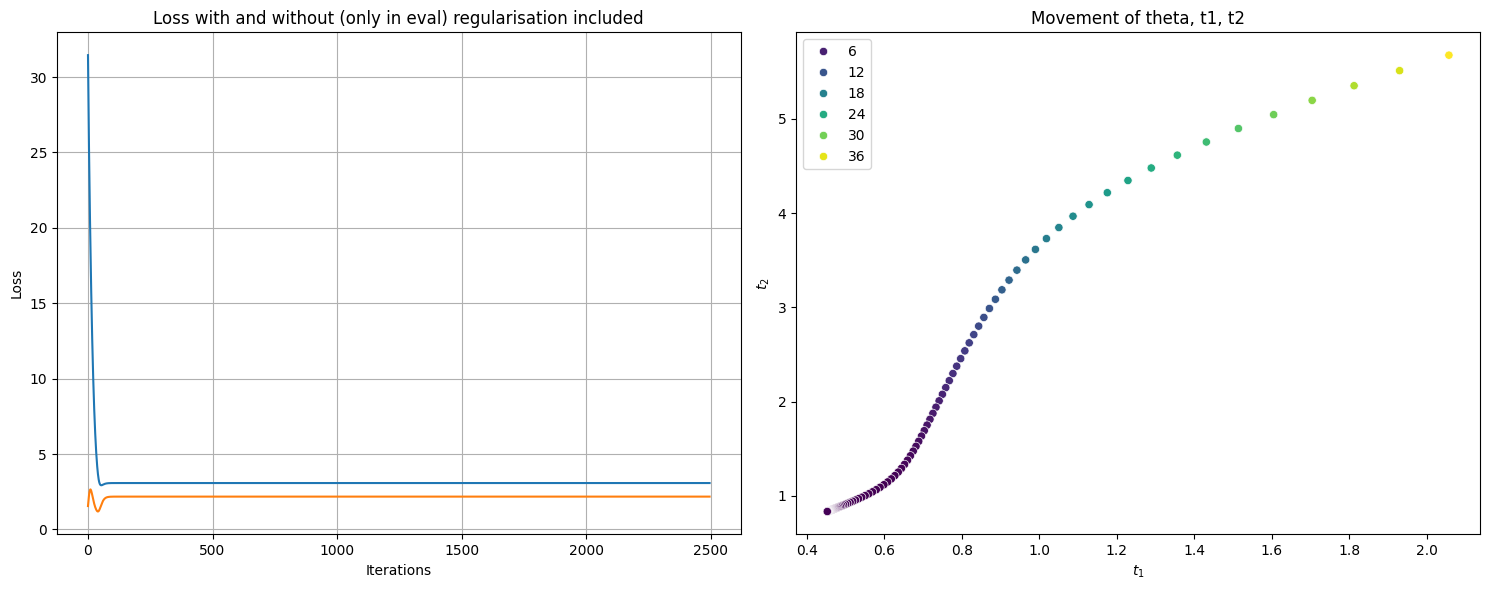

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First plot (Loss with and without regularization)
axs[0].plot(losses[4:])
axs[0].plot(losses0[4:])
axs[0].grid(True)
axs[0].set_title("Loss with and without (only in eval) regularisation included")
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')

# Second plot (Movement of theta, t1, t2)
t_h = np.array(t_h)
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[1], marker='o')
axs[1].set_xlabel(r'$t_1$')
axs[1].set_ylabel(r'$t_2$')
axs[1].set_title("Movement of theta, t1, t2")

# Show the combined plot
plt.tight_layout()
plt.show()

In [8]:
# Generate a grid of t1 and t2 values
t1_vals = np.linspace(np.min(t_h[1:][:, 0]) - 0.2, np.max(t_h[1:][:, 0]) + 0.2, 400)
t2_vals = np.linspace(np.min(t_h[1:][:, 1]) - 0.2, np.max(t_h[1:][:, 1]) + 0.2, 400)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

# Calculate loss for each pair of (t1, t2)
loss = np.zeros_like(t1)
for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
        t = np.array([t1[i, j], t2[i, j]])
        loss[i, j] = Remp(t, X, y, L)


### Visualizing the loss function

visualizing the progression of the theta values (represented by $t_1$ and $t_2$) against the background of the loss function, which helps us understand how the parameters evolve during optimization and how they interact with the shape of the loss landscape.

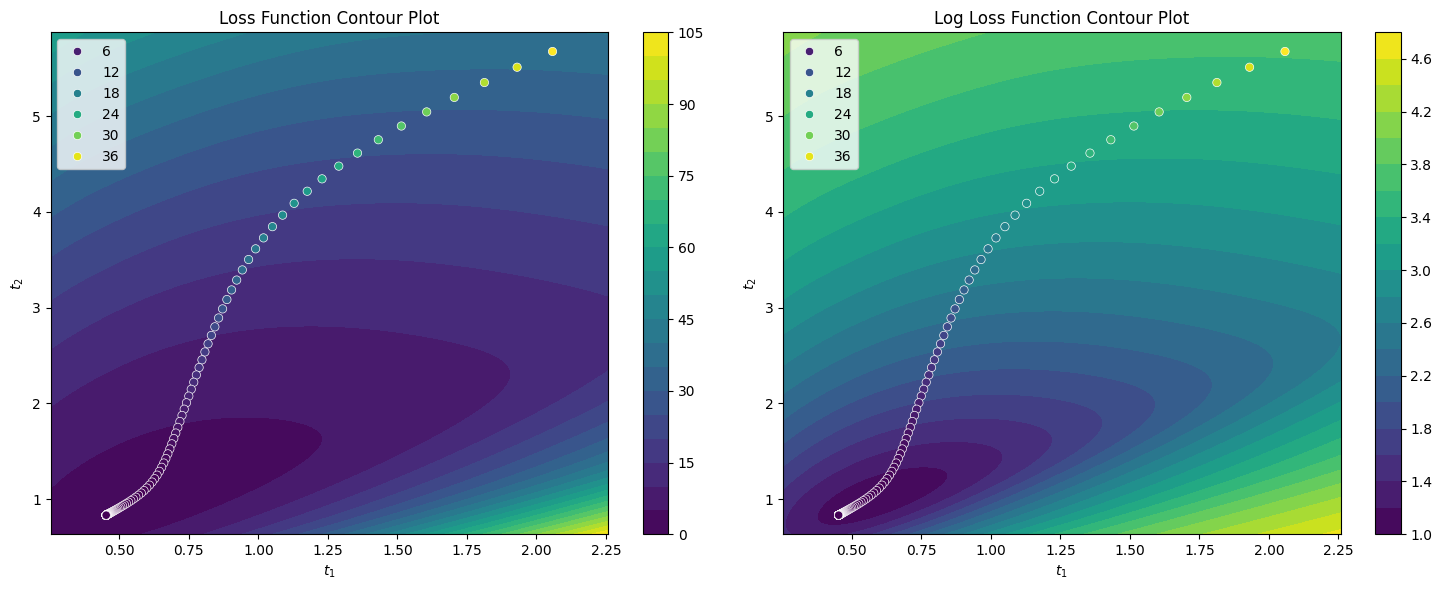

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First contour plot: Loss Function Contour Plot (original loss)
cp1 = axs[0].contourf(t1, t2, loss, levels=20, cmap='viridis')
fig.colorbar(cp1, ax=axs[0])  # Add color bar to the first plot
axs[0].set_title("Loss Function Contour Plot")
axs[0].set_xlabel("$t_1$")
axs[0].set_ylabel("$t_2$")
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[0], marker='o')

# Second contour plot: Log Loss Function Contour Plot
cp2 = axs[1].contourf(t1, t2, np.log(loss), levels=20, cmap='viridis')
fig.colorbar(cp2, ax=axs[1])  # Add color bar to the second plot
axs[1].set_title("Log Loss Function Contour Plot")
axs[1].set_xlabel("$t_1$")
axs[1].set_ylabel("$t_2$")
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[1], marker='o')

plt.tight_layout()
plt.show()


### Without using any regularization

We can see a growth of the theta values past what is good as what is dicussed at the start.

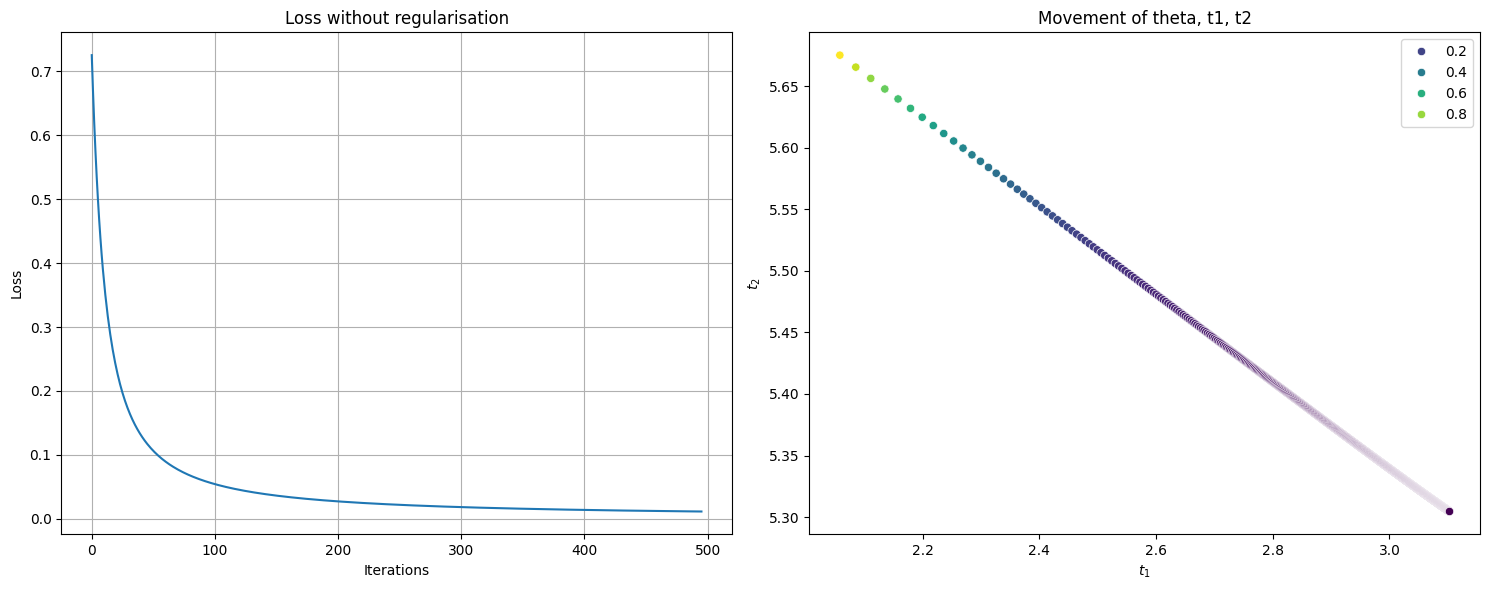

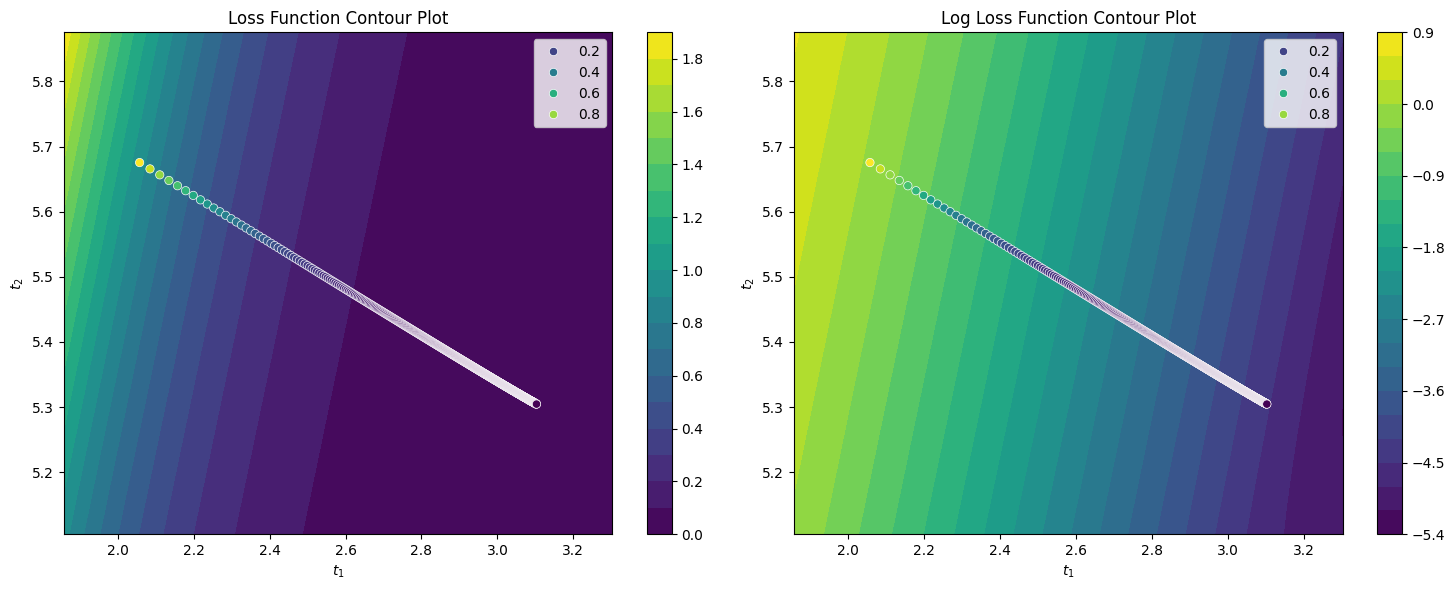

In [10]:
# Theta
theta = np.random.rand(2)
theta = np.zeros(2)

# Rates
a = 0.01
L = 0.00

# History 
losses = []
# losses0 = []
t_h = []

for i in range(500):
    losses.append(Remp(theta, X, y, L))
    losses0.append(Remp(theta, X, y, 0))
    t_h.append(theta.copy())
    theta -= a*gradRemp(theta, X, y, L)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First plot (Loss with and without regularization)
axs[0].plot(losses[4:])
# axs[0].plot(losses0[4:])
axs[0].grid(True)
axs[0].set_title("Loss without regularisation")
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')

# Second plot (Movement of theta, t1, t2)
t_h = np.array(t_h)
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[1], marker='o')
axs[1].set_xlabel(r'$t_1$')
axs[1].set_ylabel(r'$t_2$')
axs[1].set_title("Movement of theta, t1, t2")

# Show the combined plot
plt.tight_layout()
plt.show()

# Generate a grid of t1 and t2 values
t1_vals = np.linspace(np.min(t_h[1:][:, 0]) - 0.2, np.max(t_h[1:][:, 0]) + 0.2, 400)
t2_vals = np.linspace(np.min(t_h[1:][:, 1]) - 0.2, np.max(t_h[1:][:, 1]) + 0.2, 400)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

# Calculate loss for each pair of (t1, t2)
loss = np.zeros_like(t1)
for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
        t = np.array([t1[i, j], t2[i, j]])
        loss[i, j] = Remp(t, X, y, L)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First contour plot: Loss Function Contour Plot (original loss)
cp1 = axs[0].contourf(t1, t2, loss, levels=20, cmap='viridis')
fig.colorbar(cp1, ax=axs[0])  # Add color bar to the first plot
axs[0].set_title("Loss Function Contour Plot")
axs[0].set_xlabel("$t_1$")
axs[0].set_ylabel("$t_2$")
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[0], marker='o')

# Second contour plot: Log Loss Function Contour Plot
cp2 = axs[1].contourf(t1, t2, np.log(loss), levels=20, cmap='viridis')
fig.colorbar(cp2, ax=axs[1])  # Add color bar to the second plot
axs[1].set_title("Log Loss Function Contour Plot")
axs[1].set_xlabel("$t_1$")
axs[1].set_ylabel("$t_2$")
sns.scatterplot(x=t_h[1:][:, 0], y=t_h[1:][:, 1], hue=losses[1:], palette='viridis', ax=axs[1], marker='o')

plt.tight_layout()
plt.show()